In [1]:
from helper_function import Bab2
from math import *

Bab2 = Bab2()

# Pertumbuhan dan Peluruhan

{cot intro}

Bagaimana Memodelkan Populasi Manusia?

{cot intro (lagi)}

## Model Malthus
{cot karya [Thomas Robert Malthus](https://en.wikipedia.org/wiki/Malthusian_growth_model)}. Dalam modelnya, laju populasi manusia akan **tumbuh sebanding** dengan banyak populasinya. Secara matematis, dengan $t$ menyatakan waktu dan $P(t)$ menyatakan populasi manusia saat $t$, hubungan ini dapat ditulis sebagai $$\frac{dP}{dt} \propto P$$ atau, dengan menyatakan rasio pertumbuhan populasi sebagai $r$, $$\frac{dP}{dt} = rP$$ (jelas terlihat) persamaan terakhir ini adalah bentuk persamaan differensial.


Dengan menggunakan metode separasi variabel, persamaan ini memiliki solusi **persamaan analitik**

$$P_t = P_0\,e^{rt}$$

dengan $P_0$ adalah besar populasi awal. namun solusi analitik sering kali sulit untuk didapatkan. Hal ini umumnya terjadi karena persamaan yang dikerjakan memang terlalu sulit, perlu menggunakan fungsi-fungsi yang "eksotis" untuk menyelesaikannya, memerlukan waktu yang sangat lama untuk ditemukan, dsb. Dalam keadaan seperti itu, kita beralih ke **persamaan beda hingga** yang menawarkan hampiran solusi yang mudah didapatkan. Dengan memperhatikan bahwa (banyak populasi saat $t$), sama dengan (banyak populasi saat $t-\Delta t$) ditambah (banyaknya pertumbuhan populasi tersebut selama $\Delta t$). Atau secara matematis:

$$P_t = P_{t-\Delta t} + P_{t-\Delta t}\Delta t
\\ = P_{t-\Delta t}\,(1 + \Delta t)
$$

### Contoh Permasalahan

{tulis sini}

Berikut ini adalah implementasi kedua jenis persamaan beda di atas dalam bahasa Python

In [2]:
# inisialisasi variabel
LamaSimulasi = 2      # dalam satuan tahun
PopulasiA    = [1000] # populasi awal untuk persamaan [A]nalitik
PopulasiB    = [1000] # populasi awal untuk persamaan [B]eda hingga
RasioTumbuh  = 0.02
dt           = 1/365
waktu        = range(1, int(LamaSimulasi/dt)+1)


# menghitung besar populasi untuk setiap setiap iterasi, dan
# menambahkannya ke list populasi yang sudah ada
for iterasi in waktu[:-1]:

    PopulasiA.append(PopulasiA[0] * exp(RasioTumbuh*iterasi))
    PopulasiB.append(PopulasiB[iterasi-1] * (1 + RasioTumbuh))

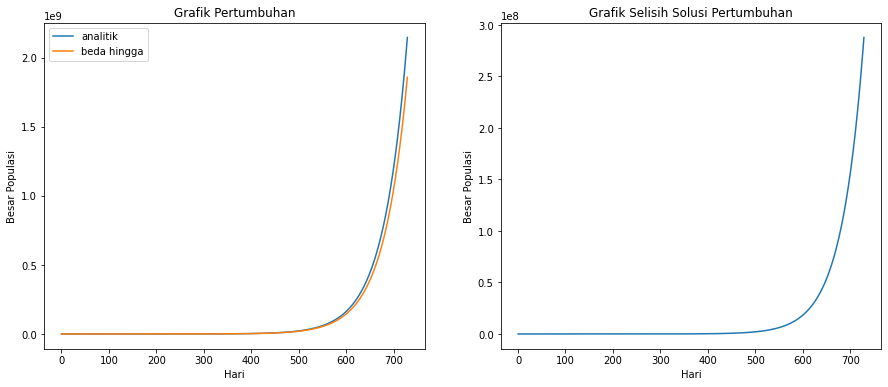

In [3]:
Bab2.Plot(PopulasiA, PopulasiB)

Terlihat bahwa solusi yang didapatkan dari persamaan beda hingga "bergerak" menjauhi solusi analitik seiring berjalannya iterasi. Hal ini tidak dapat dihindari karena metode beda hingga yang ditulis mengakumulasikan error-error yang terjadi pada iterasi-iterasi sebelumnya. Pada mata kuliah yang lebih lanjut (misal, Matematika Numerik), anda akan mempelajari metode-metode yang dapat dilakukan untuk menekan tingkat error oleh persamaan beda tersebut.

## Model Logistik

Model Malthus tidak mempertimbangkan kapasitas lingkungan, seperti luas daerah dan makanan yang tersedia. Hal ini dapat diperbaiki dengan mempertimbangkan anggota populasi yang meninggal. Anggap banyaknya populasi yang meninggal sebagai $D$, dan kapasitas lingkungan sebagai $M$. Dengan asumsi banyak kematian populasi sebanding dengan pertumbuhan populasi, maka dapat ditulis

$$\frac{dD}{dt} = \Big(r\frac{P}{M}\Big)P$$

mensubtitusi persamaan ini ke model Malthus, didapatkan

$$\frac{dP}{dt} = rP - \Big(r\frac{P}{M}\Big)P
\\= rP\Big(1-\frac{P}{M}\Big)$$

lewat metode dekomposisi variabel solusi analitik persamaan ini adalah:

$$ P_t = \frac{MP_0 e^{rt}}{M + P_0(e^{rt}-1)}$$

wow, itu sulit dan sepertinya salah. Namun, persamaan beda hingganya masih masuk akal

$$P_t = P_{t-\Delta t} + rP_{t-\Delta t}\Big(1-\frac{1}{M}P_{t-\Delta t}\Big)$$

mari lakukan hal yg sama ke model logistik ini:

In [4]:
# inisialisasi variabel
LamaSimulasi = 2    # dalam tahun
PopulasiA    = [1000] # Analitik
PopulasiB    = [1000] # Beda hingga
RasioTumbuh  = 0.02
Kapasitas    = 4e6
dt           = 1/365
waktu        = range(1, int(LamaSimulasi/dt)+1)


# menghitung besar populasi baru setiap iterasi, dan
# menambahkannya ke array populasi yang sudah ada
for iterasi in waktu[:-1]:
    # secara analitik
    P0ert = PopulasiA[0]*exp(RasioTumbuh*iterasi)
    PopulasiA.append( (Kapasitas * P0ert)/(Kapasitas - PopulasiA[0] + P0ert) )

    # secara beda hingga
    PopulasiB.append( PopulasiB[iterasi-1]*(1 + RasioTumbuh*(1-PopulasiB[iterasi-1]/Kapasitas)))

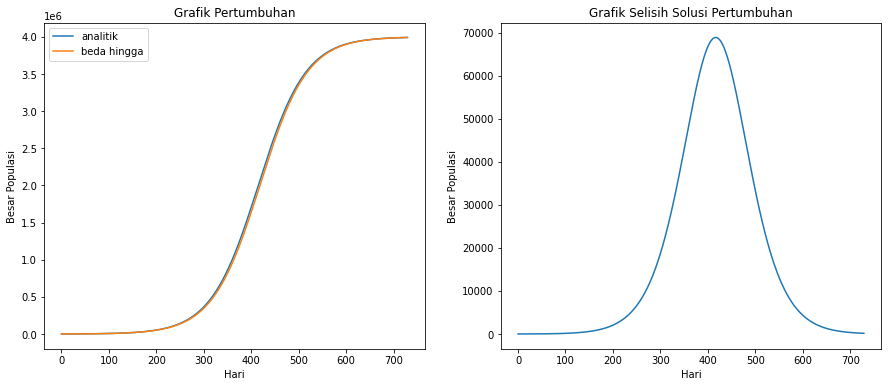

In [7]:
Bab2.Plot(PopulasiA, PopulasiB)

{penjelasan}

## Ekuibrilium dan Stabilitas Model

# Kumpulan Permasalahan

{kasus pertumbuhan dan peluruhan yang lain}

1. **Model Investasi**

    Develop a model for an investment that has approximately a continuous growth rate of 9.3%.


2. **Outbreak Kolera di Broad Street (1854)**
    
    
    * https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak wow!
    * https://www.theguardian.com/news/datablog/2013/mar/15/john-snow-cholera-map

    bagaimana model dimana laju kasus kematian sebanding dengan akar kuadrat dari kasus?


3. **Membeli Mobil**

    A young professional would like to save enough money to pay cash for a new car. Develop a model to determine when such a purchase will be possible. Take into account the following issues: The price of a new car is rising due to inflation. The buyer plans to trade in a car, which is depreciating. This person already has some savings and plans to make regular monthly payments. Thus, use a $\Delta t$ value of 1 mo. Assume appropriate rates and values.


4. **Hukum Pemanasan-Pendinginan Newton**

    {cot intro}
    

5. **Kapasitas Lingkungan Bersifat Dinamik**

    In some situations, the carrying capacity itself is dynamic. For example, the performance of airplanes had one carrying capacity with piston engines and a higher limit with the advent of jet engines. Many think that human population growth over a limited period of time follows such a pattern as technological changes enable more people to live on the available resources. In such cases, we might be able to model the carrying capacity itself as a logistic. Suppose $M_1$ is the first carrying capacity, and $M_1 + M_2$ is the second. The differential equation for the carrying capacity $M(t)$ as a function of time $t$ would be as follows:
    
    $$\frac{dM(t)}{dt} = a (M(t)-M_1) \Big( 1 -\frac{M(t)-M_1}{M_2} \Big)$$

    for some constant $a>0$. By using $M(t)$, we have a logistic for the carrying capacity as well as a logistic for the population. Figure 2.3.3 displays population, $P(t)$, in black and $M(t)$ in color with the first carrying capacity $M_1 = 20$; the second, $M_1 + M_2 = 70$; and an inlection point for $M$ at $t = 450$. Notice that we get a “bilogistic,” or “doubly logistic,” model for $P(t)$. Develop a model for the following scenario. 


6. **Perburuan Paus**

    It has been estimated that for the Antarctic in whale, $r = 0.08$, $M = 400,000$, and $P_0 = 70,000$ in 1976. Model this situation. Then, revise the model to consider harvesting the whales as a percentage of $rM$. Give various values for this percentage that lead to extinction and other values that lead to increases in the population. Estimate the maximum sustainable yield, or the percentage of $rM$ that gives a constant population in the long term (Zill 2013).